# Lab 4

## Import libs and connect to database

In [4]:
import pandas
import configparser
import psycopg2

In [5]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [6]:
cur=conn.cursor()

## Q1

In [7]:
q1_sql = """
        select * from gp5.student
        """

In [8]:
df = pandas.read_sql_query(q1_sql,conn)
df[:]

,student_email,student_name,major
0,s1email@dukes.jmu.edu,Emily Smith,IA
1,s2email@dukes.jmu.edu,Jason Smith,IA
2,s3email@dukes.jmu.edu,Karen Smith,IA
3,s4email@dukes.jmu.edu,Sarah Smith,IA
4,s5email@dukes.jmu.edu,Kelly Smith,IA
5,s6email@dukes.jmu.edu,Tabitha Smith,IA
6,s7email@dukes.jmu.edu,John Smith,IA
7,s8email@dukes.jmu.edu,Cassidy Smith,IA
8,s9email@dukes.jmu.edu,Brittany Smith,IA
9,s10email@dukes.jmu.edu,Meghan Smith,IA


## Q2

In [14]:
q2_sql = """
        select gp5.professor.p_name,
        gp5.course.c_name
        from gp5.professor
        inner join gp5.course
        on gp5.professor.p_email = gp5.course.p_email
        """

In [15]:
df=pandas.read_sql_query(q2_sql,conn)
df[:]

,p_name,c_name
0,Noel Hendrickson,intro
1,Orlandrew Danzell,natsec
2,Tim Walton,hypothesis testing
3,Stephan Marrin,ia seminar
4,new_p,new_c_name


## Q3

In [16]:
q3_sql = """
        select course_num,
        count(course_num) as num_enroll
        from gp5.enroll_list
        group by course_num
        """

In [17]:
df=pandas.read_sql_query(q3_sql,conn)
df[:]

,course_num,num_enroll
0,ia200,3
1,ia261,3
2,ia300,2
3,ia150,2


<AxesSubplot:xlabel='course_num'>

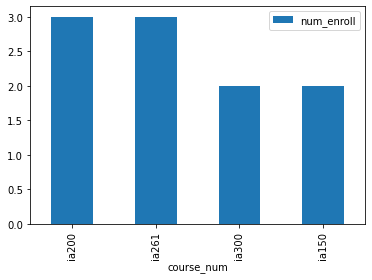

In [19]:
df.plot.bar(x='course_num',y='num_enroll')

## Q4

In [20]:
q4_sql = """
        select gp5.professor.p_name,
        count(gp5.course.c_name) as num_course
        from gp5.professor
        inner join gp5.course
        on gp5.professor.p_email = gp5.course.p_email
        group by gp5.professor.p_name
        """

In [21]:
df=pandas.read_sql_query(q4_sql,conn)
df[:]

,p_name,num_course
0,Noel Hendrickson,1
1,Tim Walton,1
2,Stephan Marrin,1
3,new_p,1
4,Orlandrew Danzell,1


## Q5

In [22]:
q5_insert_professor_sql = """
            insert into gp5.professor(p_email,p_name,office)
            values('{}','{}','{}')
            """.format('new_lab4_email','new_p_lab4_name','new_lab4_o')
print(q5_insert_professor_sql)


            insert into gp5.professor(p_email,p_name,office)
            values('new_lab4_email','new_p_lab4_name','new_lab4_o')
            


In [23]:
cur.execute(q5_insert_professor_sql)

In [24]:
conn.commit()

In [26]:
df=pandas.read_sql_query('select * from gp5.professor',conn)
df[:]

,p_email,p_name,office
0,hendrinx@jmu.edu,Noel Hendrickson,None
1,danzelox@jmu.edu,Orlandrew Danzell,None
2,waltontr@jmu.edu,Tim Walton,isat326
3,marrinsp@jmu.edu,Stephan Marrin,engeo2104
4,new_p@jmu.edu,new_p,new_office
5,new_lab4_email,new_p_lab4_name,new_lab4_o


In [27]:
q5_insert_course_sql = """
            insert into gp5.course(course_num,c_name,room_num,p_email)
            values('{}','{}','{}','{}')
            """.format('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
print(q5_insert_course_sql)


            insert into gp5.course(course_num,c_name,room_num,p_email)
            values('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
            


In [28]:
cur.execute(q5_insert_course_sql)

In [29]:
conn.commit()

In [30]:
df=pandas.read_sql_query('select * from gp5.course',conn)
df[:]

,course_num,c_name,room_num,p_email
0,ia150,intro,engeo2301,hendrinx@jmu.edu
1,ia200,natsec,isat350,danzelox@jmu.edu
2,ia261,hypothesis testing,isat136,waltontr@jmu.edu
3,ia300,ia seminar,isat150,marrinsp@jmu.edu
4,ia_new,new_c_name,online,new_p@jmu.edu
5,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


## Q6

In [31]:
q6_update_course_sql ="""
                    update gp5.course
                    set p_email = '{}'
                    where p_email ='{}'
                    """.format('new_lab4_email','t2@jmu.edu')

In [32]:
cur.execute(q6_update_course_sql)

In [33]:
conn.commit()

In [35]:
df=pandas.read_sql_query('select * from gp5.course',conn)
df[:]

,course_num,c_name,room_num,p_email
0,ia150,intro,engeo2301,hendrinx@jmu.edu
1,ia200,natsec,isat350,danzelox@jmu.edu
2,ia261,hypothesis testing,isat136,waltontr@jmu.edu
3,ia300,ia seminar,isat150,marrinsp@jmu.edu
4,ia_new,new_c_name,online,new_p@jmu.edu
5,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


In [36]:
q6_delete_professor_sql = """
                            delete from gp5.professor
                            where p_email='{}'
                            """.format('t2@jmu.edu')

In [37]:
cur.execute(q6_delete_professor_sql)

In [38]:
conn.commit()

In [39]:
df=pandas.read_sql_query('select * from gp5.professor',conn)
df[:]

,p_email,p_name,office
0,hendrinx@jmu.edu,Noel Hendrickson,None
1,danzelox@jmu.edu,Orlandrew Danzell,None
2,waltontr@jmu.edu,Tim Walton,isat326
3,marrinsp@jmu.edu,Stephan Marrin,engeo2104
4,new_p@jmu.edu,new_p,new_office
5,new_lab4_email,new_p_lab4_name,new_lab4_o


## Close Cursor and Connection

In [40]:
cur.close()

In [42]:
conn.close()